# Logistic Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [21]:
songs = pd.read_csv('music_genre.csv')
songs.head()

,Unnamed: 0,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,...,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),Genre
0,0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,...,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic
1,1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,...,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic
2,2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,...,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic
3,3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,...,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;
4,4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,...,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;


In [22]:
songs.dtypes

Unnamed: 0                 int64
artist_names              object
artists_id                object
danceability             float64
energy                   float64
valence                  float64
tempo                    float64
loudness                 float64
mode                       int64
key                        int64
acousticness             float64
instrumentalness         float64
liveness                 float64
speechiness              float64
explicit                   int64
duration_ms                int64
popularity                 int64
year                       int64
release_date              object
song_title (censored)     object
Genre                     object
dtype: object

In [23]:
for column in songs.columns:
    print(f"Column {column} has {songs[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column artist_names has 0 null values
Column artists_id has 0 null values
Column danceability has 0 null values
Column energy has 0 null values
Column valence has 0 null values
Column tempo has 0 null values
Column loudness has 0 null values
Column mode has 0 null values
Column key has 0 null values
Column acousticness has 0 null values
Column instrumentalness has 0 null values
Column liveness has 0 null values
Column speechiness has 0 null values
Column explicit has 0 null values
Column duration_ms has 0 null values
Column popularity has 0 null values
Column year has 0 null values
Column release_date has 0 null values
Column song_title (censored) has 0 null values
Column Genre has 0 null values


In [24]:
songs.describe()

,Unnamed: 0,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year
count,99463.000000,99463.000000,99463.000000,99463.000000,99463.000000,99463.000000,99463.000000,99463.000000,99463.000000,99463.000000,99463.000000,99463.000000,99463.000000,9.946300e+04,99463.000000,99463.000000
mean,49731.000000,0.529888,0.534036,0.535397,118.954006,-10.751529,0.722570,5.170847,0.417769,0.122328,0.207718,0.064375,0.037310,2.401123e+05,35.853232,1981.299699
std,28712.639249,0.163569,0.262747,0.256923,29.750368,4.987163,0.447733,3.509358,0.351993,0.268030,0.188137,0.077195,0.189522,1.098591e+05,17.190226,19.385181
min,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.108000e+03,0.000000,1921.000000
25%,24865.500000,0.420000,0.321000,0.329000,96.341000,-13.569000,0.000000,2.000000,0.059600,0.000000,0.095500,0.033300,0.000000,1.764670e+05,24.000000,1966.000000
50%,49731.000000,0.538000,0.537000,0.544000,116.960000,-10.151000,1.000000,5.000000,0.358000,0.000169,0.131000,0.041600,0.000000,2.202670e+05,36.000000,1980.000000
75%,74596.500000,0.647000,0.755000,0.747000,136.979500,-7.034000,1.000000,8.000000,0.765000,0.029900,0.257000,0.061600,0.000000,2.753040e+05,48.000000,1997.000000
max,99462.000000,0.985000,1.000000,1.000000,244.091000,3.744000,1.000000,11.000000,0.996000,0.999000,1.000000,0.964000,1.000000,3.816373e+06,100.000000,2020.000000


In [25]:
popularity = songs['popularity']
popularity.value_counts()

42     2339
31     2292
0      2277
35     2206
40     2196
       ... 
90        4
91        3
89        3
100       1
93        1
Name: popularity, Length: 95, dtype: int64

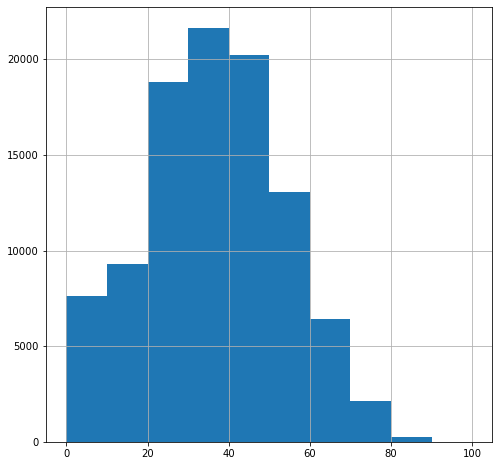

In [26]:
popularity.hist(figsize=(8,8))

In [27]:
conditions = [
    (songs['popularity'] > 48),
    (songs['popularity'] <= 48)
]

values = ['1','0']

songs['is_popular'] = np.select(conditions, values)

songs.head()

,Unnamed: 0,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),Genre,is_popular
0,0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,...,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic,1
1,1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,...,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic,1
2,2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,...,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic,1
3,3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,...,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;,0
4,4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,...,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;,0


In [28]:
songs.dtypes

Unnamed: 0                 int64
artist_names              object
artists_id                object
danceability             float64
energy                   float64
valence                  float64
tempo                    float64
loudness                 float64
mode                       int64
key                        int64
acousticness             float64
instrumentalness         float64
liveness                 float64
speechiness              float64
explicit                   int64
duration_ms                int64
popularity                 int64
year                       int64
release_date              object
song_title (censored)     object
Genre                     object
is_popular                object
dtype: object

In [33]:
songs['is_popular'] = songs['is_popular'].astype(int)

In [34]:
songs.dtypes

danceability        float64
energy              float64
valence             float64
tempo               float64
loudness            float64
acousticness        float64
instrumentalness    float64
liveness            float64
speechiness         float64
is_popular            int32
dtype: object

In [31]:
#drop string 
songs = songs.select_dtypes(include=['int64','float64'])

In [32]:
songs = songs.drop(['Unnamed: 0','duration_ms','year','explicit','key','mode','popularity'],axis = 1)
songs.head()

,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,is_popular
0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,1.0
1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,1.0
2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,1.0
3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,0.0
4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,0.0


In [35]:
songs.head()

,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,is_popular
0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,1
1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,1
2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,1
3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,0
4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,0


In [36]:
y = songs["is_popular"]
X = songs.drop(columns="is_popular")

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=100000,
   random_state=42)

In [39]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=100000, random_state=42)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.786495616504464


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[18170   809]
 [ 4500  1387]]


In [43]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     18979
           1       0.63      0.24      0.34      5887

    accuracy                           0.79     24866
   macro avg       0.72      0.60      0.61     24866
weighted avg       0.76      0.79      0.75     24866



# Linear Regression

In [44]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

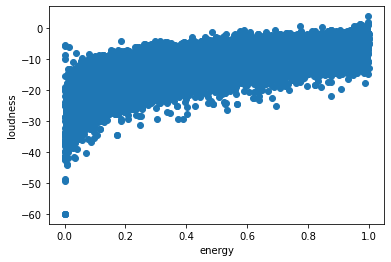

In [45]:
plt.scatter(songs.energy, songs.loudness)
plt.xlabel('energy')
plt.ylabel('loudness')
plt.show()

In [46]:
X = songs.energy.values.reshape(-1, 1)

In [47]:
X[:5]

array([[0.365],
       [0.326],
       [0.531],
       [0.702],
       [0.828]])

In [48]:
X.shape

(99463, 1)

In [49]:
y = songs.loudness

In [50]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(99463,)


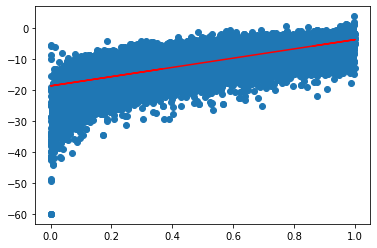

In [51]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [52]:
print(model.coef_)
print(model.intercept_)

[14.91536295]
-18.71687520109212


# SVM

In [53]:
y = songs["is_popular"]
X = songs.drop(columns="is_popular")

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y,  random_state=1, stratify=y)
X_train.shape

(74597, 9)

In [55]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [56]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7632510254966621

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     18979
           1       0.00      0.00      0.00      5887

    accuracy                           0.76     24866
   macro avg       0.38      0.50      0.43     24866
weighted avg       0.58      0.76      0.66     24866



C:\Users\yuuna\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Encode/Scale and Normalize Data

In [84]:
songs = pd.read_csv('music_genre.csv')
songs.head()

,Unnamed: 0,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,...,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),Genre
0,0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,...,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic
1,1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,...,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic
2,2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,...,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic
3,3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,...,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;
4,4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,...,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;


In [85]:
conditions = [
    (songs['popularity'] > 48),
    (songs['popularity'] <= 48)
]

values = ['1','0']

songs['is_popular'] = np.select(conditions, values)

songs.head()

,Unnamed: 0,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),Genre,is_popular
0,0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,...,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic,1
1,1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,...,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic,1
2,2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,...,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic,1
3,3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,...,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;,0
4,4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,...,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;,0


In [86]:
songs['is_popular'] = songs['is_popular'].astype(int)

In [87]:
songs = songs.drop(['Unnamed: 0','artist_names','artists_id','duration_ms','year','explicit','key','mode','popularity','release_date','song_title (censored)'],axis = 1)
songs.head()

,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,Genre,is_popular
0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,Electronic,1
1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,Electronic,1
2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,Electronic,1
3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,R&B;,0
4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,R&B;,0


In [73]:
#songs['Genre'].unique()

array(['Electronic', 'R&B;', 'Vocal', 'Jazz', 'Pop/Rock', 'Religious',
       'Blues', 'Country', 'New Age', 'Folk', 'International', 'Reggae',
       'Latin', 'Comedy/Spoken', 'Easy Listening', 'Classical',
       'Avant-Garde', 'Stage & Screen', "Children's", 'Unknown'],
      dtype=object)

In [88]:
songs_binary_encoded = pd.get_dummies(songs, columns=["Genre"])
songs_binary_encoded.head()

,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,is_popular,...,Genre_Jazz,Genre_Latin,Genre_New Age,Genre_Pop/Rock,Genre_R&B;,Genre_Reggae,Genre_Religious,Genre_Stage & Screen,Genre_Unknown,Genre_Vocal
0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,1,...,0,0,0,0,0,0,0,0,0,0
1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,1,...,0,0,0,0,0,0,0,0,0,0
2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,1,...,0,0,0,0,0,0,0,0,0,0
3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,0,...,0,0,0,0,1,0,0,0,0,0
4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
# genres = {
#     'Electronic': 1,
#     'R&B;': 2,
#     'Vocal': 3,
#     'Jazz': 4,
#     'Pop/Rock': 5,
#     'Religious': 6,
#     'Blues': 7,
#     'Country': 8,
#     'New Age': 9,
#     'Folk': 10,
#     'International': 11,
#     'Reggae': 12,
#     'Easy Listening': 15,
#     'Classical': 16,
#     'Avant-Garde': 17,
#     'Stage & Screen': 18,
#     "Children's": 19,
#     'Unknown': 20,
# }


In [76]:
# songs['genres'] = songs['Genre'].apply(lambda x: genres[x])

In [77]:
# songs

,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,Genre,genres
0,0.600,0.365,0.131,130.046,-13.083,0.06720,0.585000,0.0921,0.0498,Electronic,1
1,0.874,0.326,0.179,119.620,-13.302,0.01360,0.148000,0.0993,0.1310,Electronic,1
2,0.670,0.531,0.336,139.385,-8.267,0.01560,0.345000,0.3060,0.0377,Electronic,1
3,0.761,0.702,0.850,104.773,-8.523,0.10800,0.000031,0.0935,0.0389,R&B;,2
4,0.661,0.828,0.902,115.078,-12.673,0.27600,0.000001,0.2870,0.0390,R&B;,2
...,...,...,...,...,...,...,...,...,...,...,...
99458,0.276,0.892,0.715,80.475,-7.035,0.40900,0.000000,0.7140,0.0893,Pop/Rock,5
99459,0.700,0.592,0.906,109.847,-10.434,0.10800,0.018400,0.1180,0.0681,Pop/Rock,5
99460,0.709,0.709,0.863,111.544,-12.023,0.11800,0.000011,0.1250,0.0370,Pop/Rock,5
99461,0.552,0.651,0.533,161.548,-10.624,0.00494,0.034900,0.1320,0.2290,Pop/Rock,5


In [78]:
# songs = songs.drop(["Genre"], axis=1)
# songs.head()

,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,genres
0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,1
1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,1
2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,1
3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,2
4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,2


In [89]:
songs_binary_encoded.to_csv('songs_encoded.csv') 

In [90]:
songs_binary_encoded

,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,is_popular,...,Genre_Jazz,Genre_Latin,Genre_New Age,Genre_Pop/Rock,Genre_R&B;,Genre_Reggae,Genre_Religious,Genre_Stage & Screen,Genre_Unknown,Genre_Vocal
0,0.600,0.365,0.131,130.046,-13.083,0.06720,0.585000,0.0921,0.0498,1,...,0,0,0,0,0,0,0,0,0,0
1,0.874,0.326,0.179,119.620,-13.302,0.01360,0.148000,0.0993,0.1310,1,...,0,0,0,0,0,0,0,0,0,0
2,0.670,0.531,0.336,139.385,-8.267,0.01560,0.345000,0.3060,0.0377,1,...,0,0,0,0,0,0,0,0,0,0
3,0.761,0.702,0.850,104.773,-8.523,0.10800,0.000031,0.0935,0.0389,0,...,0,0,0,0,1,0,0,0,0,0
4,0.661,0.828,0.902,115.078,-12.673,0.27600,0.000001,0.2870,0.0390,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99458,0.276,0.892,0.715,80.475,-7.035,0.40900,0.000000,0.7140,0.0893,0,...,0,0,0,1,0,0,0,0,0,0
99459,0.700,0.592,0.906,109.847,-10.434,0.10800,0.018400,0.1180,0.0681,0,...,0,0,0,1,0,0,0,0,0,0
99460,0.709,0.709,0.863,111.544,-12.023,0.11800,0.000011,0.1250,0.0370,0,...,0,0,0,1,0,0,0,0,0,0
99461,0.552,0.651,0.533,161.548,-10.624,0.00494,0.034900,0.1320,0.2290,0,...,0,0,0,1,0,0,0,0,0,0


In [91]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [92]:
loans_data_scaled = data_scaler.fit_transform(songs_binary_encoded)

In [93]:
loans_data_scaled[:5]

array([[ 0.42864395, -0.64334563, -1.57400783,  0.37283739, -0.46749686,
        -0.99595921,  1.7262015 , -0.61454466, -0.18881272,  1.79550569,
        -0.05119461, -0.11566107, -0.02436262, -0.15487972, -0.05882561,
        -0.30482114, -0.09300666,  8.29449194, -0.12047607, -0.12315366,
        -0.29538634, -0.19026939, -0.05246231, -0.97919351, -0.35188764,
        -0.12478412, -0.08657783, -0.11516911, -0.01143324, -0.26572784],
       [ 2.10378844, -0.79177806, -1.38718052,  0.02238618, -0.51140983,
        -1.14823577,  0.09578074, -0.57627454,  0.86307282,  1.79550569,
        -0.05119461, -0.11566107, -0.02436262, -0.15487972, -0.05882561,
        -0.30482114, -0.09300666,  8.29449194, -0.12047607, -0.12315366,
        -0.29538634, -0.19026939, -0.05246231, -0.97919351, -0.35188764,
        -0.12478412, -0.08657783, -0.11516911, -0.01143324, -0.26572784],
       [ 0.85660058, -0.01155632, -0.77609952,  0.68675105,  0.49818736,
        -1.14255381,  0.83077591,  0.52239678, -0

In [94]:
import numpy as np
print(np.mean(loans_data_scaled[:,0]))
print(np.std(loans_data_scaled[:,0]))

-2.7146400127568853e-17
1.0


# DecisionTree

In [95]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [99]:
df_songs = pd.read_csv('songs_encoded.csv')
df_songs.head()

,Unnamed: 0,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,...,Genre_Jazz,Genre_Latin,Genre_New Age,Genre_Pop/Rock,Genre_R&B;,Genre_Reggae,Genre_Religious,Genre_Stage & Screen,Genre_Unknown,Genre_Vocal
0,0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,...,0,0,0,0,0,0,0,0,0,0
1,1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,...,0,0,0,0,0,0,0,0,0,0
2,2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,...,0,0,0,0,0,0,0,0,0,0
3,3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,...,0,0,0,0,1,0,0,0,0,0
4,4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,...,0,0,0,0,1,0,0,0,0,0


In [101]:
# Define the features set.
X = df_songs.copy()
X = X.drop(["is_popular","Unnamed: 0"], axis=1)
X.head()

,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,Genre_Avant-Garde,...,Genre_Jazz,Genre_Latin,Genre_New Age,Genre_Pop/Rock,Genre_R&B;,Genre_Reggae,Genre_Religious,Genre_Stage & Screen,Genre_Unknown,Genre_Vocal
0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,0,...,0,0,0,0,0,0,0,0,0,0
1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,0,...,0,0,0,0,0,0,0,0,0,0
2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,0,...,0,0,0,0,0,0,0,0,0,0
3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,0,...,0,0,0,0,1,0,0,0,0,0
4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,0,...,0,0,0,0,1,0,0,0,0,0


In [102]:
# Define the target set.
y = df_songs["is_popular"].values
y[:5]

array([1, 1, 1, 0, 0], dtype=int64)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [104]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(74597, 29)
(24866, 29)
(74597,)
(24866,)


In [105]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [106]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

In [107]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)

In [108]:
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [109]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,15481,3489
Actual 1,3188,2708


In [110]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [111]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,15481,3489
Actual 1,3188,2708


Accuracy Score : 0.7314807367489745
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     18970
           1       0.44      0.46      0.45      5896

    accuracy                           0.73     24866
   macro avg       0.63      0.64      0.64     24866
weighted avg       0.74      0.73      0.73     24866



# RandomForestClassifier

In [112]:
# Initial imports.
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [113]:
df_songs = pd.read_csv('songs_encoded.csv')
df_songs.head()

,Unnamed: 0,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,...,Genre_Jazz,Genre_Latin,Genre_New Age,Genre_Pop/Rock,Genre_R&B;,Genre_Reggae,Genre_Religious,Genre_Stage & Screen,Genre_Unknown,Genre_Vocal
0,0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,...,0,0,0,0,0,0,0,0,0,0
1,1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,...,0,0,0,0,0,0,0,0,0,0
2,2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,...,0,0,0,0,0,0,0,0,0,0
3,3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,...,0,0,0,0,1,0,0,0,0,0
4,4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,...,0,0,0,0,1,0,0,0,0,0


In [114]:
# Define the features set.
X = df_songs.copy()
X = X.drop(["is_popular","Unnamed: 0"], axis=1)
X.head()

,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,Genre_Avant-Garde,...,Genre_Jazz,Genre_Latin,Genre_New Age,Genre_Pop/Rock,Genre_R&B;,Genre_Reggae,Genre_Religious,Genre_Stage & Screen,Genre_Unknown,Genre_Vocal
0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,0,...,0,0,0,0,0,0,0,0,0,0
1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,0,...,0,0,0,0,0,0,0,0,0,0
2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,0,...,0,0,0,0,0,0,0,0,0,0
3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,0,...,0,0,0,0,1,0,0,0,0,0
4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,0,...,0,0,0,0,1,0,0,0,0,0


In [115]:
# Define the target set.
y = df_songs["is_popular"].ravel()
y[:5]

array([1, 1, 1, 0, 0], dtype=int64)

In [116]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [117]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [118]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [119]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [120]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [121]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,17888,1082
Actual 1,3656,2240


In [123]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [124]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,17888,1082
Actual 1,3656,2240


Accuracy Score : 0.809458698624628
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     18970
           1       0.67      0.38      0.49      5896

    accuracy                           0.81     24866
   macro avg       0.75      0.66      0.68     24866
weighted avg       0.79      0.81      0.79     24866



In [125]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([9.92355808e-02, 1.07443071e-01, 1.01633122e-01, 9.10432751e-02,
       1.66113300e-01, 1.16221948e-01, 8.24025502e-02, 9.08573180e-02,
       8.86501803e-02, 1.84559117e-04, 1.35574713e-03, 3.49449566e-05,
       7.61838187e-04, 2.03130455e-04, 4.56028808e-03, 4.51192309e-04,
       5.92930101e-03, 7.68830244e-04, 1.16809763e-03, 6.90575094e-03,
       7.96894148e-03, 3.99756920e-04, 1.19829371e-02, 5.65843339e-03,
       1.61231756e-03, 1.88528646e-03, 1.17299840e-03, 6.77574959e-05,
       3.32754600e-03])

In [126]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.16611330009332617, 'loudness'),
 (0.11622194754946512, 'acousticness'),
 (0.10744307128570826, 'energy'),
 (0.10163312174436259, 'valence'),
 (0.09923558082620774, 'danceability'),
 (0.09104327512354758, 'tempo'),
 (0.09085731795913439, 'liveness'),
 (0.08865018032089937, 'speechiness'),
 (0.08240255021816584, 'instrumentalness'),
 (0.011982937108597071, 'Genre_Pop/Rock'),
 (0.00796894148372644, 'Genre_Latin'),
 (0.006905750936398651, 'Genre_Jazz'),
 (0.005929301014755419, 'Genre_Electronic'),
 (0.005658433392807072, 'Genre_R&B;'),
 (0.004560288079282821, 'Genre_Country'),
 (0.0033275459991820968, 'Genre_Vocal'),
 (0.0018852864596384056, 'Genre_Religious'),
 (0.0016123175581919218, 'Genre_Reggae'),
 (0.0013557471265424983, 'Genre_Blues'),
 (0.001172998400996948, 'Genre_Stage & Screen'),
 (0.0011680976346756002, 'Genre_International'),
 (0.0007688302439338643, 'Genre_Folk'),
 (0.0007618381868096159, 'Genre_Classical'),
 (0.0004511923086257006, 'Genre_Easy Listening'),
 (0.0003997569

In [ ]:
#'loudness' and 'acousticness' of song list are the more relevant features.

# Boosting

In [142]:
df_songs = pd.read_csv('songs_encoded.csv')
df_songs.head()

,Unnamed: 0,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,...,Genre_Jazz,Genre_Latin,Genre_New Age,Genre_Pop/Rock,Genre_R&B;,Genre_Reggae,Genre_Religious,Genre_Stage & Screen,Genre_Unknown,Genre_Vocal
0,0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,...,0,0,0,0,0,0,0,0,0,0
1,1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,...,0,0,0,0,0,0,0,0,0,0
2,2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,...,0,0,0,0,0,0,0,0,0,0
3,3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,...,0,0,0,0,1,0,0,0,0,0
4,4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,...,0,0,0,0,1,0,0,0,0,0


In [143]:
# Define the features set.
X = df_songs.copy()
X = X.drop(["is_popular","Unnamed: 0"], axis=1)
X.head()

,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,Genre_Avant-Garde,...,Genre_Jazz,Genre_Latin,Genre_New Age,Genre_Pop/Rock,Genre_R&B;,Genre_Reggae,Genre_Religious,Genre_Stage & Screen,Genre_Unknown,Genre_Vocal
0,0.600,0.365,0.131,130.046,-13.083,0.0672,0.585000,0.0921,0.0498,0,...,0,0,0,0,0,0,0,0,0,0
1,0.874,0.326,0.179,119.620,-13.302,0.0136,0.148000,0.0993,0.1310,0,...,0,0,0,0,0,0,0,0,0,0
2,0.670,0.531,0.336,139.385,-8.267,0.0156,0.345000,0.3060,0.0377,0,...,0,0,0,0,0,0,0,0,0,0
3,0.761,0.702,0.850,104.773,-8.523,0.1080,0.000031,0.0935,0.0389,0,...,0,0,0,0,1,0,0,0,0,0
4,0.661,0.828,0.902,115.078,-12.673,0.2760,0.000001,0.2870,0.0390,0,...,0,0,0,0,1,0,0,0,0,0


In [144]:
y = df_songs["is_popular"].ravel()
y[:5]

array([1, 1, 1, 0, 0], dtype=int64)

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [139]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.763
Accuracy score (validation): 0.765

Learning rate:  0.1
Accuracy score (training): 0.770
Accuracy score (validation): 0.772

Learning rate:  0.25
Accuracy score (training): 0.793
Accuracy score (validation): 0.795

Learning rate:  0.5
Accuracy score (training): 0.799
Accuracy score (validation): 0.797

Learning rate:  0.75
Accuracy score (training): 0.799
Accuracy score (validation): 0.797

Learning rate:  1
Accuracy score (training): 0.798
Accuracy score (validation): 0.794



In [148]:
classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=0.75, max_features=5, max_depth=3, random_state=0)

classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)

In [149]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.796509289793292


In [150]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
   cm, index=["Actual 0", "Actual 1"],
   columns=["Predicted 0", "Predicted 1"]
)
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,17905,1127
Actual 1,3933,1901


In [151]:
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     19032
           1       0.63      0.33      0.43      5834

    accuracy                           0.80     24866
   macro avg       0.72      0.63      0.65     24866
weighted avg       0.77      0.80      0.77     24866



# Neural Network

In [259]:
songs = pd.read_csv('music_genre.csv')
songs.head()

,Unnamed: 0,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,...,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),Genre
0,0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,...,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic
1,1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,...,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic
2,2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,...,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic
3,3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,...,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;
4,4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,...,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;


In [260]:
conditions = [
    (songs['popularity'] > 48),
    (songs['popularity'] <= 48)
]

values = ['1','0']

songs['is_popular'] = np.select(conditions, values)

songs.head()

,Unnamed: 0,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),Genre,is_popular
0,0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,...,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic,1
1,1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,...,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic,1
2,2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,...,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic,1
3,3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,...,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;,0
4,4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,...,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;,0


In [261]:
songs['is_popular'] = songs['is_popular'].astype(int)

In [262]:
songs

,Unnamed: 0,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,...,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),Genre,is_popular
0,0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,...,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic,1
1,1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,...,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic,1
2,2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,...,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic,1
3,3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,...,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;,0
4,4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,...,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99458,99458,['ZZ Top'],[690254],0.276,0.892,0.715,80.475,-7.035,1,11,...,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster,Pop/Rock,0
99459,99459,['ZZ Top'],[690254],0.700,0.592,0.906,109.847,-10.434,1,11,...,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love,Pop/Rock,0
99460,99460,['ZZ Top'],[690254],0.709,0.709,0.863,111.544,-12.023,1,2,...,0.1250,0.0370,0,158400,31,1987,1987,Balinese,Pop/Rock,0
99461,99461,['ZZ Top'],[690254],0.552,0.651,0.533,161.548,-10.624,0,4,...,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster,Pop/Rock,0


In [263]:
songs.drop(columns=['Unnamed: 0','artist_names','song_title (censored)','artists_id','release_date'],inplace=True)
songs.head()

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,Genre,is_popular
0,0.600,0.365,0.131,130.046,-13.083,0,9,0.0672,0.585000,0.0921,0.0498,0,437200,54,2005,Electronic,1
1,0.874,0.326,0.179,119.620,-13.302,0,11,0.0136,0.148000,0.0993,0.1310,0,581008,53,2005,Electronic,1
2,0.670,0.531,0.336,139.385,-8.267,0,9,0.0156,0.345000,0.3060,0.0377,0,431293,55,2009,Electronic,1
3,0.761,0.702,0.850,104.773,-8.523,1,7,0.1080,0.000031,0.0935,0.0389,0,304427,34,1991,R&B;,0
4,0.661,0.828,0.902,115.078,-12.673,0,11,0.2760,0.000001,0.2870,0.0390,0,264933,37,1987,R&B;,0


In [264]:
songs_cat = songs.dtypes[songs.dtypes == "object"].index.tolist()
songs[songs_cat].nunique()

Genre    20
dtype: int64

In [265]:
song_type=songs.Genre.value_counts()
song_type

Pop/Rock          48686
R&B;              10959
Country            8456
Jazz               7982
Vocal              6560
Latin              3475
Classical          2330
Reggae             1525
International      1486
Electronic         1425
Folk               1423
Blues              1313
Stage & Screen     1302
Easy Listening      853
Religious           740
Comedy/Spoken       343
New Age             273
Avant-Garde         260
Children's           59
Unknown              13
Name: Genre, dtype: int64

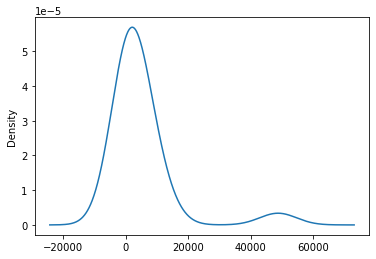

In [266]:
song_type.plot.density()

In [267]:
replace_genres = list(song_type[song_type < 2000].index)

for genre in replace_genres:
    songs.Genre = songs.Genre.replace(genre,"Other")

In [268]:
songs.Genre.value_counts()

Pop/Rock     48686
Other        11015
R&B;         10959
Country       8456
Jazz          7982
Vocal         6560
Latin         3475
Classical     2330
Name: Genre, dtype: int64

In [269]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(songs[songs_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(songs_cat)
encode_df.head()

,Genre_Classical,Genre_Country,Genre_Jazz,Genre_Latin,Genre_Other,Genre_Pop/Rock,Genre_R&B;,Genre_Vocal
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [270]:
songs = songs.merge(encode_df,left_index=True, right_index=True)
songs = songs.drop(songs_cat,1)
songs.head()

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,...,year,is_popular,Genre_Classical,Genre_Country,Genre_Jazz,Genre_Latin,Genre_Other,Genre_Pop/Rock,Genre_R&B;,Genre_Vocal
0,0.600,0.365,0.131,130.046,-13.083,0,9,0.0672,0.585000,0.0921,...,2005,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.874,0.326,0.179,119.620,-13.302,0,11,0.0136,0.148000,0.0993,...,2005,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.670,0.531,0.336,139.385,-8.267,0,9,0.0156,0.345000,0.3060,...,2009,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.761,0.702,0.850,104.773,-8.523,1,7,0.1080,0.000031,0.0935,...,1991,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.661,0.828,0.902,115.078,-12.673,0,11,0.2760,0.000001,0.2870,...,1987,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [271]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y=songs.is_popular
X=songs.drop(columns=["is_popular"])
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [272]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [273]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
    
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                1920      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 4,381
Trainable params: 4,381
Non-trainable params: 0
_________________________________________________________________


In [274]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [275]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
 971/2332 [===========>..................] - ETA: 1s - loss: 0.2394 - accuracy: 0.8923
Epoch 00001: saving model to checkpoints\weights.01.hdf5
1973/2332 [========================>.....] - ETA: 0s - loss: 0.1647 - accuracy: 0.9282
Epoch 00001: saving model to checkpoints\weights.01.hdf5
2332/2332 [==============================] - 3s 1ms/step - loss: 0.1502 - accuracy: 0.9349
Epoch 2/100
 663/2332 [=======>......................] - ETA: 1s - loss: 0.0238 - accuracy: 0.9912
Epoch 00002: saving model to checkpoints\weights.02.hdf5
1652/2332 [====================>.........] - ETA: 0s - loss: 0.0225 - accuracy: 0.9914
Epoch 00002: saving model to checkpoints\weights.02.hdf5
2332/2332 [==============================] - 2s 1ms/step - loss: 0.0219 - accuracy: 0.9916
Epoch 3/100
 288/2332 [==>...........................] - ETA: 2s - loss: 0.0136 - accuracy: 0.9948
Epoch 00003: saving model to checkpoints\weights.03.hdf5
1328/2332 [================>.............] - ETA: 1s - loss: 0

 708/2332 [========>.....................] - ETA: 1s - loss: 0.0018 - accuracy: 0.9995
Epoch 00038: saving model to checkpoints\weights.38.hdf5
1670/2332 [====================>.........] - ETA: 0s - loss: 0.0013 - accuracy: 0.9996
Epoch 00038: saving model to checkpoints\weights.38.hdf5
2332/2332 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 39/100
 356/2332 [===>..........................] - ETA: 1s - loss: 6.6078e-04 - accuracy: 1.0000
Epoch 00039: saving model to checkpoints\weights.39.hdf5
1363/2332 [================>.............] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998  
Epoch 00039: saving model to checkpoints\weights.39.hdf5
2332/2332 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 40/100
  45/2332 [..............................] - ETA: 2s - loss: 2.1460e-04 - accuracy: 1.0000
Epoch 00040: saving model to checkpoints\weights.40.hdf5
1014/2332 [============>.................] - ETA: 1s - loss: 7

2332/2332 [==============================] - 2s 1ms/step - loss: 9.5174e-04 - accuracy: 0.9997
Epoch 75/100
 420/2332 [====>.........................] - ETA: 1s - loss: 1.0287e-04 - accuracy: 1.0000
Epoch 00075: saving model to checkpoints\weights.75.hdf5
1388/2332 [================>.............] - ETA: 0s - loss: 7.8021e-05 - accuracy: 1.0000
Epoch 00075: saving model to checkpoints\weights.75.hdf5
2332/2332 [==============================] - 2s 999us/step - loss: 6.0865e-04 - accuracy: 0.9999
Epoch 76/100
  96/2332 [>.............................] - ETA: 2s - loss: 9.3188e-04 - accuracy: 1.0000
Epoch 00076: saving model to checkpoints\weights.76.hdf5
1086/2332 [============>.................] - ETA: 1s - loss: 7.6270e-04 - accuracy: 0.9999
Epoch 00076: saving model to checkpoints\weights.76.hdf5
2098/2332 [=========================>....] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 00076: saving model to checkpoints\weights.76.hdf5
2332/2332 [==============================] - 3

In [276]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

778/778 - 1s - loss: 0.0099 - accuracy: 0.9974
Loss: 0.009937700815498829, Accuracy: 0.9973859786987305
